In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

df = pd.read_csv("Taxi_Trip_Data.csv", sep=",")

C:\Users\EMILIEN\AppData\Local\Temp\ipykernel_6196\3210728685.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Taxi_Trip_Data.csv", sep=",")


In [2]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned[df_cleaned["total_amount"] > 0]
df_cleaned['store_and_fwd_flag'] = df_cleaned['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
dfTest = df_cleaned[:50000]
dfTest.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
50344,1.0,01/01/2020 03:40:06 AM,01/01/2020 03:55:42 AM,1.0,6.10,1.0,0,7,4,1.0,19.0,3.0,0.5,1.00,0.0,0.3,23.80,2.5
50345,2.0,01/01/2020 02:50:18 AM,01/01/2020 03:00:17 AM,2.0,1.84,1.0,0,107,158,1.0,8.5,0.5,0.5,2.00,0.0,0.3,14.30,2.5
50346,2.0,01/01/2020 03:01:49 AM,01/01/2020 03:14:19 AM,2.0,1.56,1.0,0,158,144,2.0,9.5,0.5,0.5,0.00,0.0,0.3,13.30,2.5
50347,2.0,01/01/2020 03:17:49 AM,01/01/2020 03:23:32 AM,2.0,1.15,1.0,0,144,231,2.0,6.0,0.5,0.5,0.00,0.0,0.3,9.80,2.5
50348,2.0,01/01/2020 03:26:54 AM,01/01/2020 03:40:49 AM,2.0,5.21,1.0,0,144,112,1.0,17.0,0.5,0.5,4.16,0.0,0.3,24.96,2.5


In [3]:
dfTest['tpep_pickup_datetime'] = pd.to_datetime(dfTest['tpep_pickup_datetime'])
dfTest['tpep_dropoff_datetime'] = pd.to_datetime(dfTest['tpep_dropoff_datetime'])
dfTest.tail()

C:\Users\EMILIEN\AppData\Local\Temp\ipykernel_6196\2986252650.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfTest['tpep_pickup_datetime'] = pd.to_datetime(dfTest['tpep_pickup_datetime'])
C:\Users\EMILIEN\AppData\Local\Temp\ipykernel_6196\2986252650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['tpep_pickup_datetime'] = pd.to_datetime(dfTest['tpep_pickup_datetime'])
C:\Users\EMILIEN\AppData\Local\Temp\ipykernel_6196\2986252650.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, p

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
50344,1.0,2020-01-01 03:40:06,2020-01-01 03:55:42,1.0,6.10,1.0,0,7,4,1.0,19.0,3.0,0.5,1.00,0.0,0.3,23.80,2.5
50345,2.0,2020-01-01 02:50:18,2020-01-01 03:00:17,2.0,1.84,1.0,0,107,158,1.0,8.5,0.5,0.5,2.00,0.0,0.3,14.30,2.5
50346,2.0,2020-01-01 03:01:49,2020-01-01 03:14:19,2.0,1.56,1.0,0,158,144,2.0,9.5,0.5,0.5,0.00,0.0,0.3,13.30,2.5
50347,2.0,2020-01-01 03:17:49,2020-01-01 03:23:32,2.0,1.15,1.0,0,144,231,2.0,6.0,0.5,0.5,0.00,0.0,0.3,9.80,2.5
50348,2.0,2020-01-01 03:26:54,2020-01-01 03:40:49,2.0,5.21,1.0,0,144,112,1.0,17.0,0.5,0.5,4.16,0.0,0.3,24.96,2.5


In [ ]:
print("Dataset shape after cleaning:", dfTest.shape)
dfTest.head()

# Here is the generated matrix into Python

Dataset shape after cleaning: (50000, 18)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


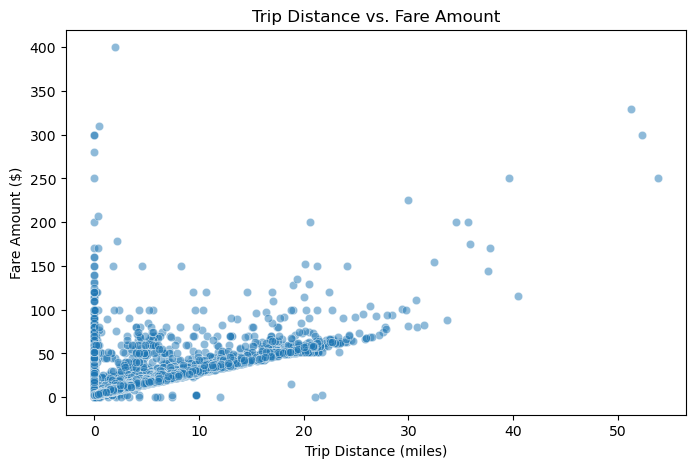

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dfTest['trip_distance'], y=dfTest['fare_amount'], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Trip Distance vs. Fare Amount")
plt.show()

# Scatter plot to see the relation between trip_distance and fare_amount
# We can see a linear function undermining prices


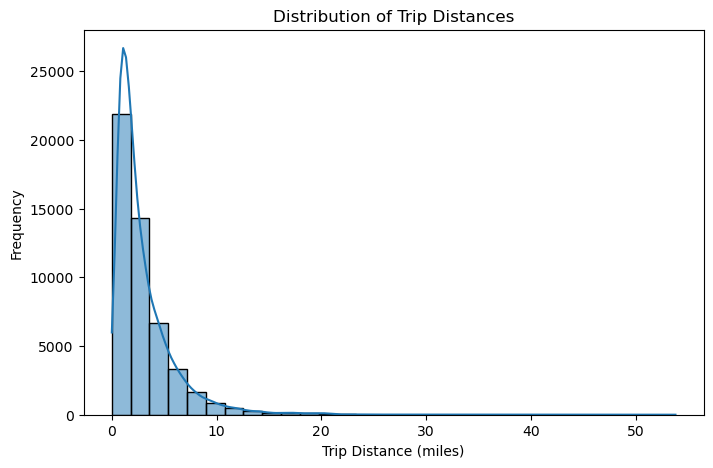

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(dfTest['trip_distance'], bins=30, kde=True)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distances")
plt.show()



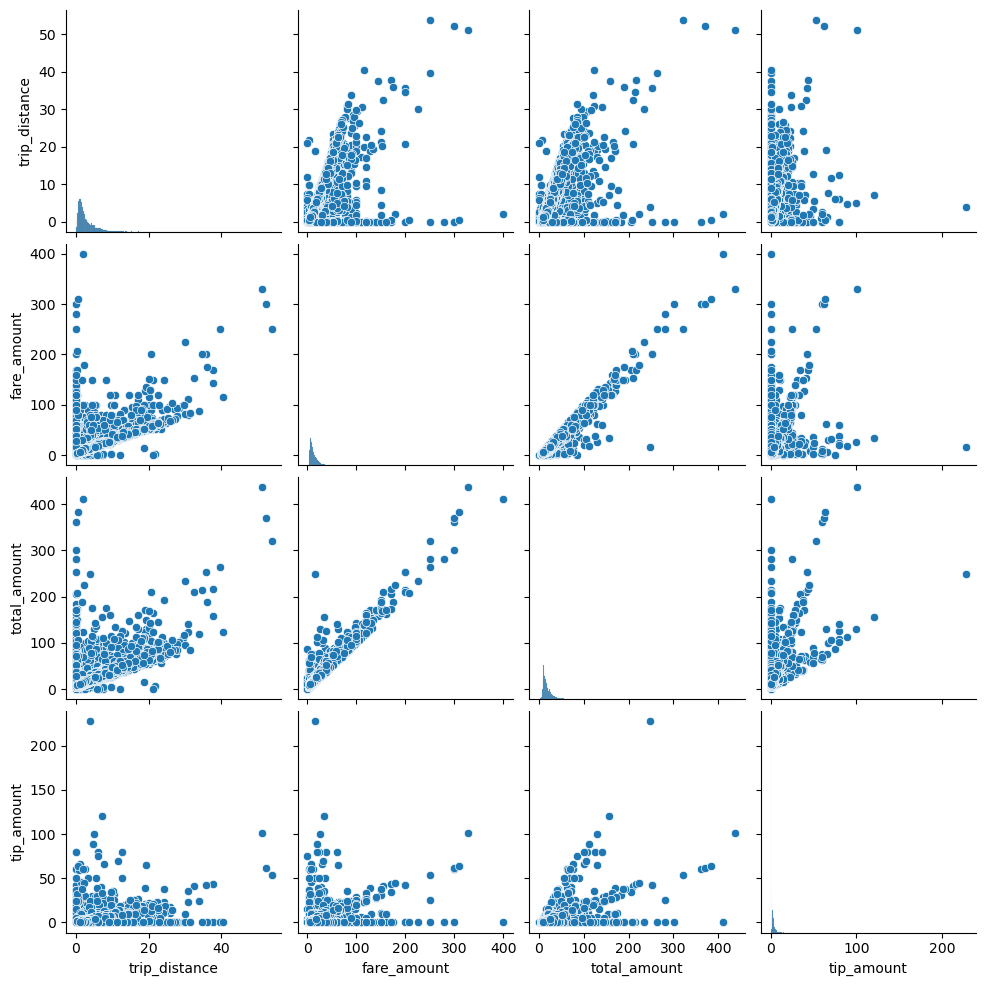

In [8]:
numerical_features = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount']
sns.pairplot(dfTest[numerical_features])
plt.show()

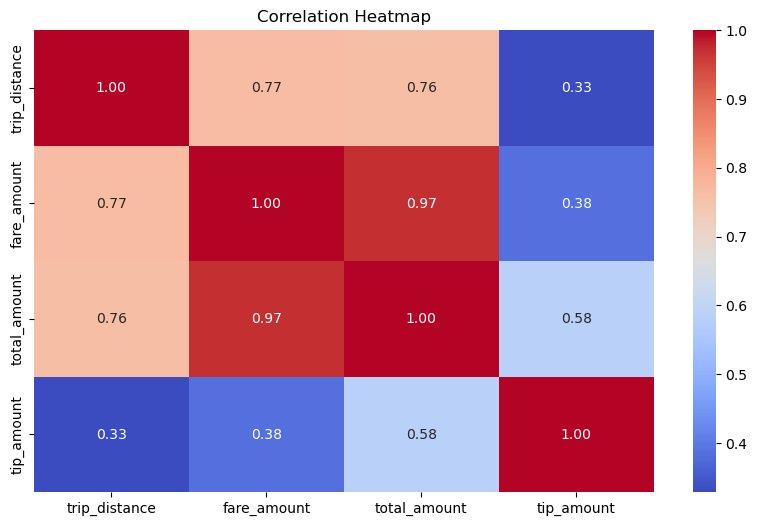

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(dfTest[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()